# EDA  
概要: お弁当の販売数の回帰予測をすること。  
実施日付: 2021-08-31  
データセット: [https://signate.jp/competitions/24/data](https://signate.jp/competitions/24/data)

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 

### 全体の傾向分析
---

In [273]:
df_ = pd.read_csv("../data/raw/train.csv")
df_["datetime"] = pd.to_datetime(df_.datetime)
df_

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
0,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
1,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
3,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
4,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1
...,...,...,...,...,...,...,...,...,...,...,...,...
202,2014-09-24,59,水,1,白身魚のマスタード焼き,408.0,NaN,NaN,NaN,曇,0,24.8
203,2014-09-25,50,木,0,牛カルビ焼き肉,394.0,NaN,NaN,NaN,曇,0,25.4
204,2014-09-26,45,金,0,ランチビュッフェ,NaN,スペシャルメニュー（800円）,キャリアアップ支援セミナー,NaN,晴れ,--,27.1
205,2014-09-29,56,月,1,豚肉と玉子の炒め,404.0,NaN,NaN,NaN,快晴,--,26.6


In [65]:
df.isnull().sum() / df.shape[0]

datetime         0.000000
y                0.000000
week             0.000000
soldout          0.000000
name             0.000000
kcal             0.198068
remarks          0.898551
event            0.932367
payday           0.951691
weather          0.000000
precipitation    0.000000
temperature      0.000000
dtype: float64

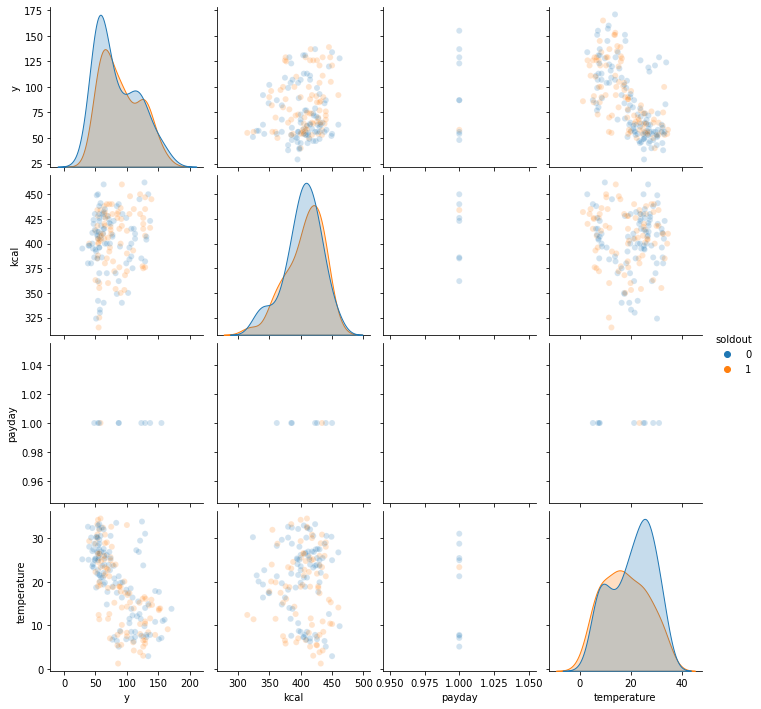

In [50]:
sns.pairplot(data=df, plot_kws={"alpha": 0.2}, hue="soldout")

In [9]:
df.dtypes

datetime         datetime64[ns]
y                         int64
week                     object
soldout                   int64
name                     object
kcal                    float64
remarks                  object
event                    object
payday                  float64
weather                  object
precipitation            object
temperature             float64
dtype: object

In [18]:
df.describe(include="all").style.background_gradient(cmap="coolwarm")

/tmp/ipykernel_256/2801353537.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include="all").style.background_gradient(cmap="coolwarm")


,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
count,207,207.000000,207,207.000000,207,166.000000,21,14,10.000000,207,207,207.000000
unique,207,nan,5,nan,156,nan,6,2,nan,7,8,nan
top,2013-11-18 00:00:00,nan,水,nan,メンチカツ,nan,お楽しみメニュー,ママの会,nan,快晴,--,nan
freq,1,nan,43,nan,6,nan,12,9,nan,53,169,nan
first,2013-11-18 00:00:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
last,2014-09-30 00:00:00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
mean,nan,86.623188,nan,0.449275,nan,404.409639,nan,nan,1.000000,nan,nan,19.252174
std,nan,32.882448,nan,0.498626,nan,29.884641,nan,nan,0.000000,nan,nan,8.611365
min,nan,29.000000,nan,0.000000,nan,315.000000,nan,nan,1.000000,nan,nan,1.200000
25%,nan,57.000000,nan,0.000000,nan,386.000000,nan,nan,1.000000,nan,nan,11.550000


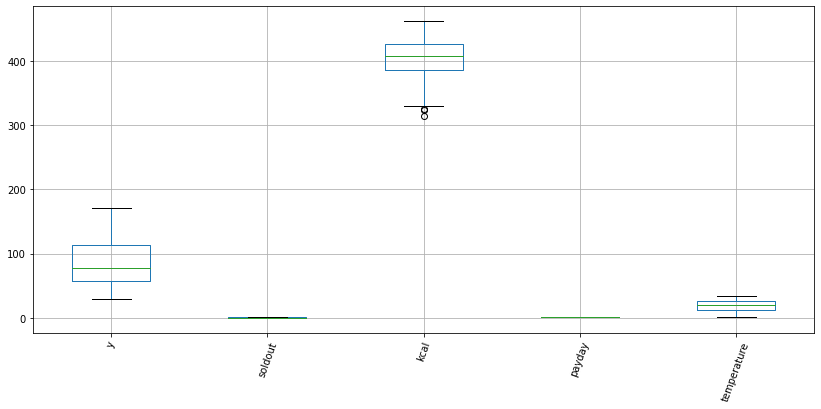

In [20]:
plt.figure(figsize=(14, 6))
df.boxplot()
plt.xticks(rotation=70)
plt.show()

### week
---

Text(0, 0.5, 'weekday')

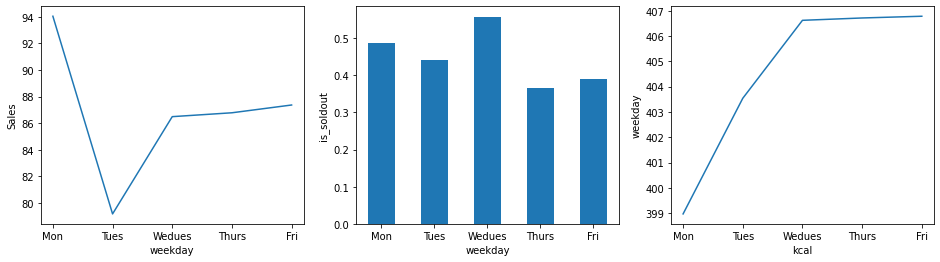

In [51]:
week_df = df.groupby("week").mean().loc[:, ["y", "soldout", "kcal"]]
week_name = ["Mon", "Tues", "Wedues", "Thurs", "Fri"]
week_df.index  = week_name

fig, axes = plt.subplots(1, 3, figsize=(16, 4))
ax = axes.ravel()
ax[0].plot(week_df["y"])
ax[0].set_xticks(week_name)
ax[0].set_ylabel("Sales")
ax[0].set_xlabel("weekday")

ax[1].bar(week_df.index, week_df["soldout"], width=0.5)
ax[1].set_xlabel("weekday")
ax[1].set_ylabel("is_soldout")

ax[2].plot(week_df["kcal"])
ax[2].set_xticks(week_name)
ax[2].set_xlabel("kcal")
ax[2].set_ylabel("weekday")

In [55]:
week_df.style.background_gradient(cmap="coolwarm")

,y,soldout,kcal
Mon,94.051282,0.487179,398.970588
Tues,79.162791,0.441860,403.540541
Wedues,86.488372,0.558140,406.621622
Thurs,86.780488,0.365854,406.714286
Fri,87.365854,0.390244,406.782609


<AxesSubplot:xlabel='holiday'>

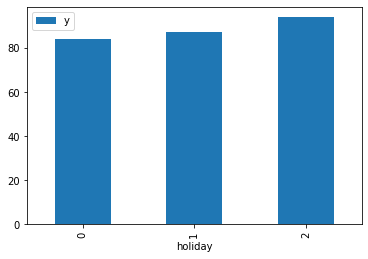

In [158]:
def holiday(x):
    if x == "金":
        return 1
    elif x == "月":
        return 2 
    else:
        return 0 

df["holiday"] = df.week.apply(holiday)
df.groupby("holiday").mean().loc[:, ["y"]].plot.bar()

In [161]:
from sklearn.preprocessing import LabelEncoder
la = LabelEncoder()
df["week"] = la.fit_transform(df.week)

### soldout 
---

<AxesSubplot:xlabel='soldout', ylabel='y'>

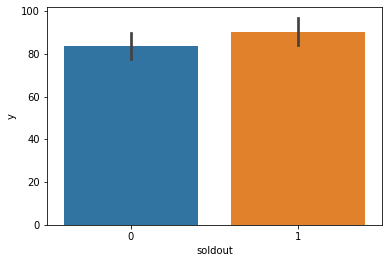

In [56]:
sns.barplot(data=df, x="soldout", y="y")

### name 
---

In [61]:
name = df.name.value_counts()
pd.DataFrame({"name": name.index, "counts": name.values})

,name,counts
0,メンチカツ,6
1,タンドリーチキン,6
2,手作りロースカツ,5
3,鶏の唐揚げおろしソース,4
4,回鍋肉,4
...,...,...
151,白身魚唐揚げ野菜あんかけ,1
152,ポークハヤシ,1
153,酢豚orカレー,1
154,ハンバーグ和風きのこソース,1


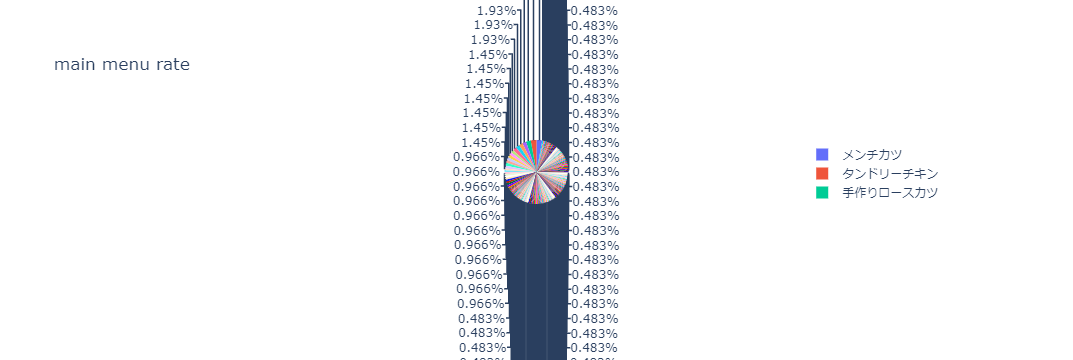

In [60]:
fig = px.pie(values=df.name.value_counts().values, labels=df.name.value_counts().index, 
             names=df.name.value_counts().index, title="main menu rate")
fig.show()

In [66]:
name = df.groupby("name").mean().sort_values(by="y", ascending=False).loc[:, ["y", "soldout", "kcal"]]
name[:10]

,y,soldout,kcal
name,,,
カキフライタルタル,160.0,0.0,NaN
五目御飯,157.0,0.0,NaN
やわらかロースのサムジョン,155.0,0.0,NaN
厚揚げ豚生姜炒め,153.0,1.0,NaN
クリームチーズ入りメンチ,151.0,1.0,NaN
ハンバーグ,151.0,0.0,NaN
ポーク味噌焼き,151.0,0.0,NaN
豚のスタミナ炒め,145.0,0.0,NaN
ハンバーグカレーソース,135.0,0.5,426.0


In [67]:
name[-10:]

,y,soldout,kcal
name,,,
鶏の天ぷら,47.0,0.0,420.0
カレイ唐揚げ 甘酢あん,46.0,0.0,395.0
サーモンフライ・タルタル,45.0,0.0,411.0
ランチビュッフェ,45.0,0.0,NaN
厚切イカフライ,45.0,0.0,400.0
鶏肉とカシューナッツ炒め,40.0,0.0,398.0
厚切ハムカツ,40.0,1.0,400.0
チキンの辛味噌焼き,39.0,0.0,398.0
豚肉の生姜焼き,38.0,0.0,380.0


In [75]:
popular_name = df.name.value_counts().index[:10]

pop_name_df = name.loc[popular_name, :]
pop_name_df["counts"] = df.name.value_counts().values[:10]
pop_name_df.style.background_gradient(cmap="coolwarm")

,y,soldout,kcal,counts
メンチカツ,76.500000,0.500000,404.333333,6
タンドリーチキン,71.666667,0.833333,394.800000,6
手作りロースカツ,101.000000,0.400000,419.250000,5
鶏の唐揚げおろしソース,106.750000,0.250000,395.250000,4
回鍋肉,103.500000,0.750000,427.000000,4
マーボ豆腐,108.750000,0.500000,376.000000,4
肉じゃが,96.250000,0.250000,397.333333,4
酢豚,95.666667,0.333333,395.000000,3
キーマカレー,98.333333,0.000000,400.000000,3
チンジャオロース,105.333333,0.666667,413.333333,3


### kcal
---

/home/kooose/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 26376 missing from current font.

/home/kooose/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 28779 missing from current font.

/home/kooose/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 27700 missing from current font.

/home/kooose/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 26408 missing from current font.

/home/kooose/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning:

Glyph 37329 missing from current font.



/home/kooose/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 26376 missing from current font.

/home/kooose/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 28779 missing from current font.

/home/kooose/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 27700 missing from current font.

/home/kooose/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 26408 missing from current font.

/home/kooose/.local/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning:

Glyph 37329 missing from current font.



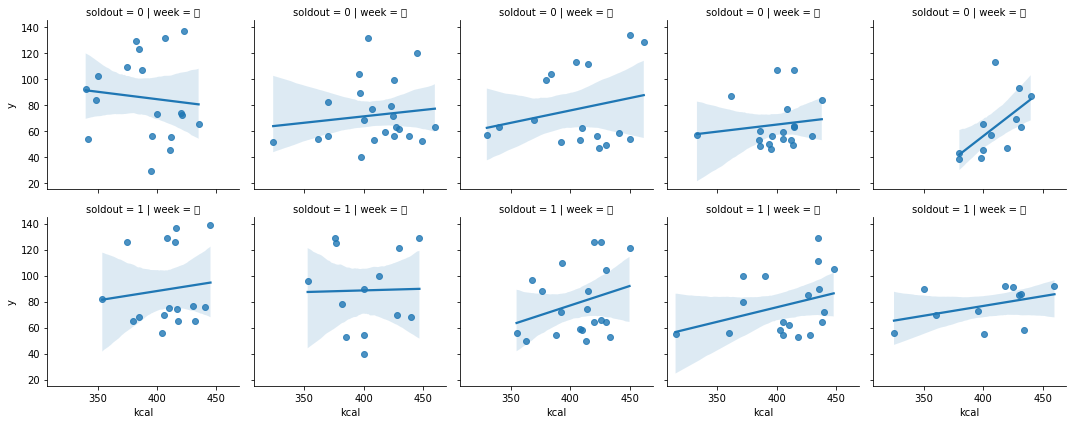

In [81]:
g = sns.FacetGrid(data=df, row="soldout", col="week")
g.map(sns.regplot, "kcal", "y")

low sale kcal mean: kcal    408.0
dtype: float64
high sale kcal mean: kcal    411.5
dtype: float64


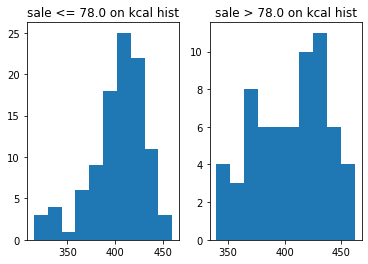

In [88]:
low_sale_kcal = df[df.y <= 78.0].loc[:, ["kcal"]]
high_sale_kcal = df[df.y > 78.0].loc[:, ["kcal"]]

plt.subplot(1, 2, 1)
plt.hist(low_sale_kcal)
plt.title("sale <= 78.0 on kcal hist")
plt.subplot(1, 2, 2)
plt.hist(high_sale_kcal)
plt.title("sale > 78.0 on kcal hist")

print(f"low sale kcal mean: {low_sale_kcal.median()}")
print(f"high sale kcal mean: {high_sale_kcal.median()}")

<AxesSubplot:xlabel='kcal_isna'>

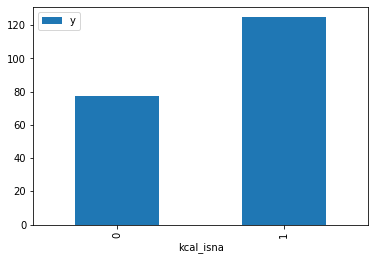

In [111]:
df["kcal_isna"] = df.kcal.isnull().astype(int)
kcal_isna = df.groupby("kcal_isna").mean().loc[:, ["y"]]
kcal_isna.plot.bar()

In [112]:
kcal_mean_mon = df[df.week == "月"].loc[:, ["kcal"]].mean()
kcal_mean_thes = df[df.week == "火"].loc[:, ["kcal"]].mean()
kcal_mean_wed = df[df.week == "水"].loc[:, ["kcal"]].mean()
kcal_mean_thr = df[df.week == "木"].loc[:, ["kcal"]].mean()
kcal_mean_fri = df[df.week == "金"].loc[:, ["kcal"]].mean()

mon = df[df.week == "月"].loc[:, ["kcal"]].fillna(kcal_mean_mon)
thes = df[df.week == "火"].loc[:, ["kcal"]].fillna(kcal_mean_thes)
wed = df[df.week == "水"].loc[:, ["kcal"]].fillna(kcal_mean_wed)
thr = df[df.week == "木"].loc[:, ["kcal"]].fillna(kcal_mean_thr)
fri = df[df.week == "金"].loc[:, ["kcal"]].fillna(kcal_mean_fri)
df["kcal"] = pd.concat([mon, thes, wed, thr, fri])


,kcal
4,406.782609
9,406.782609
14,406.782609
19,406.782609
24,406.782609
31,440.000000
35,430.000000
40,418.000000
45,460.000000
50,425.000000


### remarks
---

In [130]:
remarks = df.remarks.value_counts()
remarks_ = df.groupby("remarks").mean().loc[:, ["y"]]
re = pd.DataFrame({"remarks": remarks.index, "remarks_counts": remarks.values})
pd.merge(re, remarks_, how="outer", left_on="remarks", right_on="remarks").style.background_gradient(cmap="coolwarm")

,remarks,remarks_counts,y
0,お楽しみメニュー,12,108.750000
1,料理長のこだわりメニュー,5,55.800000
2,鶏のレモンペッパー焼（50食）、カレー（42食）,1,92.000000
3,酢豚（28食）、カレー（85食）,1,113.000000
4,手作りの味,1,68.000000
5,スペシャルメニュー（800円）,1,45.000000


<AxesSubplot:xlabel='remarks_isna'>

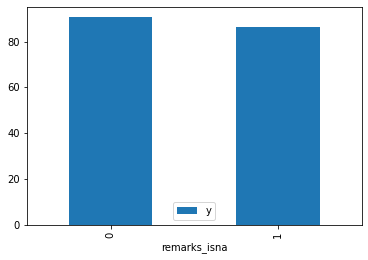

In [134]:
df["remarks_isna"] = df.remarks.isnull().astype(int)
df.groupby("remarks_isna").mean().loc[:, ["y"]].plot.bar()

In [138]:
from sklearn.preprocessing import LabelEncoder

la = LabelEncoder()
df["remarks"] = la.fit_transform(df.remarks.fillna("none"))

In [139]:
la.classes_

array(['none', 'お楽しみメニュー', 'スペシャルメニュー（800円）', '手作りの味', '料理長のこだわりメニュー',
       '酢豚（28食）、カレー（85食）', '鶏のレモンペッパー焼（50食）、カレー（42食）'], dtype=object)

### event
---

<AxesSubplot:xlabel='event_'>

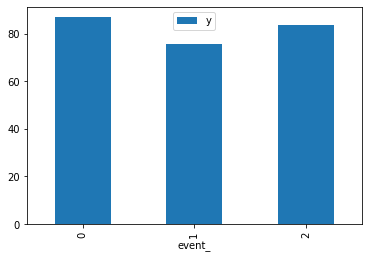

In [148]:
la = LabelEncoder()
df["event_"] = la.fit_transform(df.event.fillna("none"))
df.groupby("event_").mean().loc[:, ["y"]].plot.bar()

In [149]:
la.classes_

array(['none', 'キャリアアップ支援セミナー', 'ママの会'], dtype=object)

<AxesSubplot:xlabel='event_isna'>

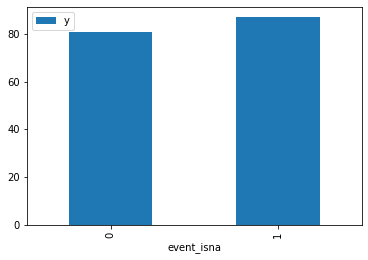

In [151]:
df["event_isna"] = df.event.isnull().astype(int)
df.groupby("event_isna").mean().loc[:, ["y"]].plot.bar()

In [153]:
df["event"] = df["event_"]
df.drop(["event_"], axis=1, inplace=True)

In [162]:
df

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,kcal_isna,remarks_isna,event_isna,holiday
0,2013-11-18,90,0,0,厚切りイカフライ,398.970588,0,0,NaN,快晴,--,19.8,1,1,1,2
1,2013-11-19,101,3,1,手作りヒレカツ,406.714286,0,0,NaN,快晴,--,17.0,1,1,1,0
2,2013-11-20,118,2,0,白身魚唐揚げ野菜あん,406.621622,0,0,NaN,快晴,--,15.5,1,1,1,0
3,2013-11-21,120,1,1,若鶏ピリ辛焼,403.540541,0,0,NaN,快晴,--,15.2,1,1,1,0
4,2013-11-22,130,4,1,ビッグメンチカツ,406.782609,0,0,NaN,快晴,--,16.1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,2014-09-24,59,2,1,白身魚のマスタード焼き,408.000000,0,0,NaN,曇,0,24.8,0,1,1,0
203,2014-09-25,50,1,0,牛カルビ焼き肉,394.000000,0,0,NaN,曇,0,25.4,0,1,1,0
204,2014-09-26,45,4,0,ランチビュッフェ,406.782609,2,1,NaN,晴れ,--,27.1,1,0,0,1
205,2014-09-29,56,0,1,豚肉と玉子の炒め,404.000000,0,0,NaN,快晴,--,26.6,0,1,1,2


### weather
---

In [188]:
df.weather.value_counts()

快晴    53
曇     53
晴れ    50
薄曇    25
雨     24
雪      1
雷電     1
Name: weather, dtype: int64

In [189]:
df.groupby("weather").mean().loc[:, ["y", "kcal", "soldout", "temperature"]]

,y,kcal,soldout,temperature
weather,,,,
快晴,103.320755,403.794567,0.433962,15.203774
晴れ,78.980000,403.334430,0.420000,23.168000
曇,86.037736,404.466391,0.415094,18.109434
薄曇,74.520000,405.412926,0.280000,23.796000
雨,80.958333,406.263465,0.750000,18.587500
雪,86.000000,432.000000,1.000000,1.200000
雷電,54.000000,428.000000,1.000000,19.000000


In [190]:
weather_type = df.weather.value_counts().index

df["weather"] = df.weather.map({weather_type[0]: 0, weather_type[2]: 0, weather_type[1]: 1, weather_type[3]: 1, 
               weather_type[4]: 2, weather_type[5]: 2, weather_type[6]: 2})

df.weather

0      0
1      0
2      0
3      0
4      0
      ..
202    1
203    1
204    0
205    0
206    0
Name: weather, Length: 207, dtype: int64

In [231]:
df["weather_before1"] = df.weather.shift(-1).fillna(0)

### precipitaion
---

In [193]:
def replace_prec(x):
    if x == "--":
        return 0
    else: 
        return x 
    
df["precipitation"] =df.precipitation.apply(replace_prec)

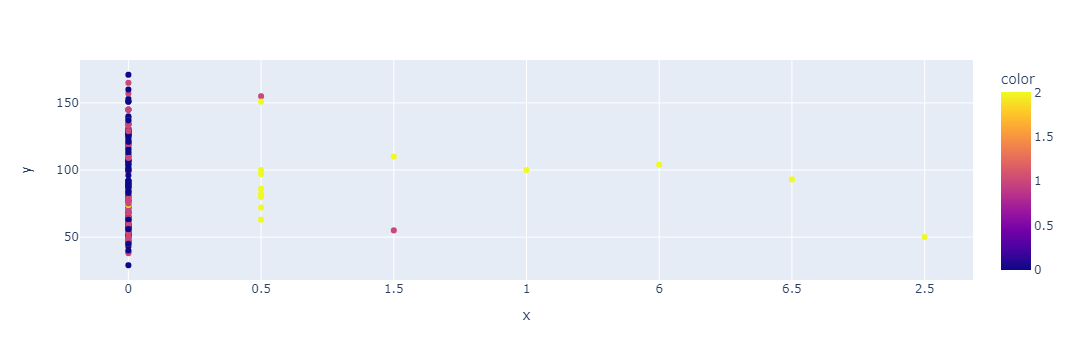

In [194]:
px.scatter(x=df.precipitation, y=df.y, color=df.weather)

### payday 
---

Text(0.5, 1.0, 'is after 1 day payday vs sales')

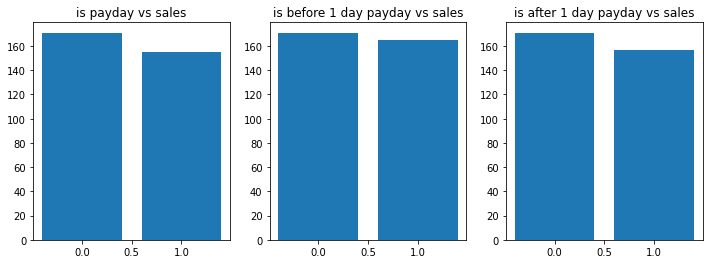

In [213]:
df["payday"] = df.payday.fillna(0)
df["payday"] = df.payday.astype(int)
df["payday_before1"] = df.payday.shift(-1).fillna(0).astype(int)
df["payday_after1"] = df.payday.shift(1).fillna(0).astype(int)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.bar(df.payday_, df.y)
plt.title("is payday vs sales")
plt.subplot(1, 3, 2)
plt.bar(df.payday_before1, df.y)
plt.title("is before 1 day payday vs sales")
plt.subplot(1, 3, 3)
plt.bar(df.payday_after1.fillna(0), df.y)
plt.title("is after 1 day payday vs sales")

### datetime 
---

In [232]:
df["sale_before1"] = df.y.shift(-1).fillna(df.y.mean())
df["moving_avg"] = df.y.rolling(window=5).mean().fillna(df.y.mean())

In [246]:
df["datetime"] = pd.to_datetime(df.datetime)
df["quarter"] = df["datetime"].dt.quarter
df["month"] = df["datetime"].dt.month
df["day"] = df["datetime"].dt.day
df["day"] = (df["day"]-1)/(31-1)

<AxesSubplot:xlabel='quarter'>

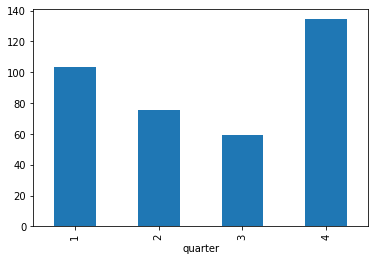

In [254]:
q_y_mean = df.groupby("quarter")["y"].mean()
df["quarter_y_maen"] = df.quarter.map(q_y_mean)
q_y_mean.plot.bar()

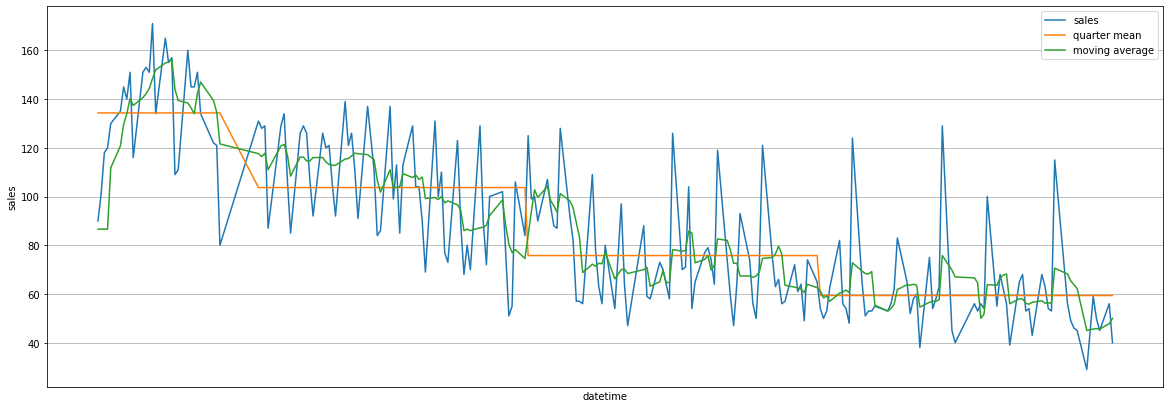

In [258]:
plt.figure(figsize=(20, 7))
plt.plot(df.datetime, df.y)
plt.plot(df.datetime, df.quarter_y_maen)
plt.plot(df.datetime, df.moving_avg)
plt.legend(["sales", "quarter mean", "moving average"])
plt.xticks([])
plt.xlabel("datetime")
plt.ylabel("sales")
plt.grid()
plt.show()

### preprocess
---


In [271]:
df = df.sort_index(ascending=True)
df.drop(["datetime", "name"], axis=1, inplace=True)

In [277]:
from category_transform import TargetEncoder 

In [302]:
tag = TargetEncoder()
tag.fit(df.drop(["y"], axis=1), df[["y"]], col="month")
df, _ = tag.transform(df.drop(["y"], axis=1))

month
1     115.222222
2     107.842105
3      89.350000
4      85.761905
5      74.200000
6      67.285714
7      61.363636
8      61.166667
9      55.550000
11    124.600000
12    139.722222
Name: target, dtype: float64

In [312]:
# train test val splits 
train = df.copy()
n_ = train.shape[0]
n_train = int(n_*.6)
n_val = int(n_*.2)

x_train, x_val, x_test, y_train, y_val, y_test = \
train.drop(["y"], axis=1).iloc[:n_train, :], train.drop(["y"], axis=1).iloc[n_train:n_val+n_train, :], train.drop(["y"], axis=1).iloc[n_val+n_train:, :], \
train[["y"]].iloc[:n_train, :], train[["y"]].iloc[n_train:n_val+n_train, :], train[["y"]].iloc[n_val+n_train:, :]


In [318]:
x_train

,week,soldout,kcal,remarks,event,payday,weather,precipitation,temperature,kcal_isna,...,payday_before1,payday_after1,weather_before1,sale_before1,moving_avg,quarter,month,day,quarter_y_maen,name
0,0,0,398.970588,0,0,0,0,0,19.8,1,...,0,0,0.0,101.0,86.623188,4,131.666667,0.566667,134.321429,76
1,3,1,406.714286,0,0,0,0,0,17.0,1,...,0,0,0.0,118.0,86.623188,4,131.666667,0.600000,134.321429,89
2,2,0,406.621622,0,0,0,0,0,15.5,1,...,0,0,0.0,120.0,86.623188,4,122.125000,0.633333,134.321429,109
3,1,1,403.540541,0,0,0,0,0,15.2,1,...,0,0,0.0,130.0,86.623188,4,131.666667,0.666667,134.321429,116
4,4,1,406.782609,0,0,0,0,0,16.1,1,...,0,0,1.0,135.0,111.800000,4,120.142857,0.700000,134.321429,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,1,1,428.000000,4,0,0,2,0,19.0,0,...,0,0,1.0,65.0,85.000000,2,76.666667,0.700000,75.774194,26
120,4,0,400.000000,0,0,0,1,0,19.8,0,...,0,0,1.0,77.0,72.800000,2,76.666667,0.733333,75.774194,102
121,0,1,430.000000,0,0,0,1,0,23.9,0,...,0,0,1.0,79.0,74.200000,2,76.666667,0.833333,75.774194,138
122,3,0,423.000000,0,0,0,1,0,23.7,0,...,0,0,0.0,74.0,75.800000,2,68.571429,0.866667,75.774194,101


In [323]:
x_train["y"] = y_train 
x_val["y"] = y_val 
x_test["y"] = y_test

x_train.to_csv("train.csv", index=False)
x_val.to_csv("val.csv", index=False)
x_test.to_csv("test.csv", index=False)